# 1) CSV Data File Analysis

In [1]:
from os import path
fname = path.expanduser('track.csv')

In [2]:
print('c:\path\to\nowhere.csv')

c:\path	o
owhere.csv


In [3]:
print(r'c:\path\to\nowhere.csv')

c:\path\to\nowhere.csv


In [4]:
!ls -lh "$fname"

-rw-rw-r-- 1 manohar manohar 43K Feb 16 17:11 track.csv


In [5]:
path.getsize(fname)

43844

In [6]:
path.getsize(fname) / (1<<10)

42.81640625

In [7]:
!head "$fname"

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219


In [8]:
with open(fname) as fp:
    for lnum, line in enumerate(fp):
        if lnum > 10:
            break
        print(line[:-1])

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219
2015-08-20 03:48:37.708,35.014515,32.519625,121.69999694824219


In [9]:
!wc -l "$fname"

741 track.csv


In [10]:
with open(fname) as fp:
    print(sum(1 for line in fp))

741


# 2) Parse Time Series

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(fname)

In [13]:
len(df)

740

In [14]:
df.columns

Index(['time', 'lat', 'lng', 'height'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 4 columns):
time      740 non-null object
lat       740 non-null float64
lng       740 non-null float64
height    740 non-null float64
dtypes: float64(3), object(1)
memory usage: 23.2+ KB


In [16]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [17]:
df.dtypes

time       object
lat       float64
lng       float64
height    float64
dtype: object

In [18]:
df = pd.read_csv(fname, parse_dates=['time'])

In [19]:
df.dtypes

time      datetime64[ns]
lat              float64
lng              float64
height           float64
dtype: object

# 3) Access Rows & Columns Data

In [20]:
df['lat'].head()

0    35.015021
1    35.014954
2    35.014871
3    35.014824
4    35.014776
Name: lat, dtype: float64

In [21]:
df.lat.head()

0    35.015021
1    35.014954
2    35.014871
3    35.014824
4    35.014776
Name: lat, dtype: float64

In [22]:
df[['lat', 'lng']].head()

,lat,lng
0,35.015021,32.519585
1,35.014954,32.519606
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689


In [23]:
df['lat'][0]

35.015021000000004

In [24]:
df.loc[0]

time      2015-08-20 03:48:07.235000
lat                           35.015
lng                          32.5196
height                         136.2
Name: 0, dtype: object

In [25]:
df.loc[2:7]

,time,lat,lng,height
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
5,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002
6,2015-08-20 03:48:30.669,35.014657,32.519734,120.900002
7,2015-08-20 03:48:33.793,35.014563,32.519719,121.699997


In [26]:
df[['lat', 'lng']][2:7]

,lat,lng
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689
5,35.014704,32.519691
6,35.014657,32.519734


In [27]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [28]:
import numpy as np
df1 = pd.DataFrame(np.arange(10).reshape((5,2)), columns=['x', 'y'], index=['a', 'b', 'c', 'd', 'e'])
df1

,x,y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [29]:
df1.loc['a']

x    0
y    1
Name: a, dtype: int64

In [30]:
df1.loc['b': 'd']

,x,y
b,2,3
c,4,5
d,6,7


In [31]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [32]:
df.index = df['time']
df.index

DatetimeIndex(['2015-08-20 03:48:07.235000', '2015-08-20 03:48:24.734000',
               '2015-08-20 03:48:25.660000', '2015-08-20 03:48:26.819000',
               '2015-08-20 03:48:27.828000', '2015-08-20 03:48:29.720000',
               '2015-08-20 03:48:30.669000', '2015-08-20 03:48:33.793000',
               '2015-08-20 03:48:34.869000', '2015-08-20 03:48:37.708000',
               ...
               '2015-08-20 04:20:18.844000', '2015-08-20 04:20:21.996000',
               '2015-08-20 04:20:22.897000', '2015-08-20 04:20:24.905000',
               '2015-08-20 04:20:25.835000', '2015-08-20 04:20:28.982000',
               '2015-08-20 04:20:29.923000', '2015-08-20 04:20:32.863000',
               '2015-08-20 04:20:33.994000', '2015-08-20 04:20:42.329000'],
              dtype='datetime64[ns]', name='time', length=740, freq=None)

In [33]:
df.loc['2015-08-20 04:18:54']

,time,lat,lng,height
time,,,,
2015-08-20 04:18:54.007,2015-08-20 04:18:54.007,35.015942,32.515209,117.099998
2015-08-20 04:18:54.893,2015-08-20 04:18:54.893,35.015937,32.515240,117.500000


In [34]:
# all masures in this particular minute
df.loc['2015-08-20 03:48']

,time,lat,lng,height
time,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
2015-08-20 03:48:24.734,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2015-08-20 03:48:25.660,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
2015-08-20 03:48:26.819,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
2015-08-20 03:48:27.828,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
2015-08-20 03:48:29.720,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002
2015-08-20 03:48:30.669,2015-08-20 03:48:30.669,35.014657,32.519734,120.900002
2015-08-20 03:48:33.793,2015-08-20 03:48:33.793,35.014563,32.519719,121.699997
2015-08-20 03:48:34.869,2015-08-20 03:48:34.869,35.014549,32.519694,121.199997


In [35]:
# pytz module contains all timezone information
import pytz

In [36]:
ts = df.index[0]

In [37]:
ts.tz_localize(pytz.UTC)

Timestamp('2015-08-20 03:48:07.235000+0000', tz='UTC')

In [38]:
ts.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))

Timestamp('2015-08-20 06:48:07.235000+0300', tz='Asia/Jerusalem')

In [39]:
df.index = df.index.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))
df.index[:10]

DatetimeIndex(['2015-08-20 06:48:07.235000+03:00',
               '2015-08-20 06:48:24.734000+03:00',
               '2015-08-20 06:48:25.660000+03:00',
               '2015-08-20 06:48:26.819000+03:00',
               '2015-08-20 06:48:27.828000+03:00',
               '2015-08-20 06:48:29.720000+03:00',
               '2015-08-20 06:48:30.669000+03:00',
               '2015-08-20 06:48:33.793000+03:00',
               '2015-08-20 06:48:34.869000+03:00',
               '2015-08-20 06:48:37.708000+03:00'],
              dtype='datetime64[ns, Asia/Jerusalem]', name='time', freq=None)

In [40]:
%pwd

'/home/manohar/Documents/GitHub_Public/DSci_Pro/1_DSci_Py_Review/1_2_pandas'

# 4) Import Custom Modules

In [41]:
import geo

In [42]:
import sys
sys.path

['/home/manohar/Documents/GitHub_Public/DSci_Pro/1_DSci_Py_Review/1_2_pandas',
 '/home/manohar/Software/anaconda3/lib/python37.zip',
 '/home/manohar/Software/anaconda3/lib/python3.7',
 '/home/manohar/Software/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/manohar/Software/anaconda3/lib/python3.7/site-packages',
 '/home/manohar/Software/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/manohar/.ipython']

In [43]:
??geo

Type:        module
String form: <module 'geo' from '/home/manohar/Documents/GitHub_Public/DSci_Pro/1_DSci_Py_Review/1_2_pandas/geo.py'>
File:        ~/Documents/GitHub_Public/DSci_Pro/1_DSci_Py_Review/1_2_pandas/geo.py
Source:     
"""Distance on a circle"""

import numpy as np


def circle_dist(lat1, lng1, lat2, lng2):
    """
    Distance on a circle (in km)

    Parameters
    ----------
    lat1, lng1, lat2, lng2: float or array of float

    Returns
    -------
    distance:
      distance from ``(lat1, lng1)`` to ``(lat2, lng2)`` in kilometers.
    """
    phi1 = np.deg2rad(90 - lat1)
    phi2 = np.deg2rad(90 - lat2)

    theta1 = np.deg2rad(lng1)
    theta2 = np.deg2rad(lng2)

    cos = (np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) +
           np.cos(phi1) * np.cos(phi2))
    arc = np.arccos(cos)
    return arc * 6373  # Earth radius in km


In [44]:
from geo import circle_dist

In [45]:
lat1, lng1 = df.iloc[0].lat, df.iloc[0].lng
lat2, lng2 = df.iloc[1].lat, df.iloc[1].lng

In [46]:
circle_dist(lat1, lng1, lat2, lng2)

0.007693931535344109

# 5) Calculate Speed (geo)

In [47]:
s = pd.Series(np.arange(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [48]:
s.shift()

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [49]:
s.shift(-1)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [50]:
dist = circle_dist(df['lat'], df['lng'], df['lat'].shift(), df['lng'].shift())

In [51]:
dist[:10]

time
2015-08-20 06:48:07.235000+03:00         NaN
2015-08-20 06:48:24.734000+03:00    0.007694
2015-08-20 06:48:25.660000+03:00    0.009248
2015-08-20 06:48:26.819000+03:00    0.006479
2015-08-20 06:48:27.828000+03:00    0.006219
2015-08-20 06:48:29.720000+03:00    0.008010
2015-08-20 06:48:30.669000+03:00    0.006533
2015-08-20 06:48:33.793000+03:00    0.010545
2015-08-20 06:48:34.869000+03:00    0.002757
2015-08-20 06:48:37.708000+03:00    0.007335
dtype: float64

In [52]:
dist.sum()

4.688098989621063

In [53]:
dt = df['time'] - df['time'].shift()
dt[:10] # NaT means Not a Time

time
2015-08-20 06:48:07.235000+03:00               NaT
2015-08-20 06:48:24.734000+03:00   00:00:17.499000
2015-08-20 06:48:25.660000+03:00   00:00:00.926000
2015-08-20 06:48:26.819000+03:00   00:00:01.159000
2015-08-20 06:48:27.828000+03:00   00:00:01.009000
2015-08-20 06:48:29.720000+03:00   00:00:01.892000
2015-08-20 06:48:30.669000+03:00   00:00:00.949000
2015-08-20 06:48:33.793000+03:00   00:00:03.124000
2015-08-20 06:48:34.869000+03:00   00:00:01.076000
2015-08-20 06:48:37.708000+03:00   00:00:02.839000
Name: time, dtype: timedelta64[ns]

In [54]:
dt.sum()

Timedelta('0 days 00:32:35.094000')

In [55]:
dt[1].total_seconds()

17.499

In [56]:
dt[1] / np.timedelta64(1, 'h')

0.004860833333333333

In [57]:
dt[1].total_seconds()/3600

0.004860833333333333

In [58]:
speed = dist / (dt / np.timedelta64(1, 'h'))
speed[:10]

time
2015-08-20 06:48:07.235000+03:00          NaN
2015-08-20 06:48:24.734000+03:00     1.582842
2015-08-20 06:48:25.660000+03:00    35.954340
2015-08-20 06:48:26.819000+03:00    20.123165
2015-08-20 06:48:27.828000+03:00    22.187213
2015-08-20 06:48:29.720000+03:00    15.241680
2015-08-20 06:48:30.669000+03:00    24.783839
2015-08-20 06:48:33.793000+03:00    12.151207
2015-08-20 06:48:34.869000+03:00     9.225036
2015-08-20 06:48:37.708000+03:00     9.301281
dtype: float64

In [59]:
df['dist'] = dist
df['dt'] = dt

In [60]:
df1m = df.resample('1min').sum()

In [61]:
df1m.index

DatetimeIndex(['2015-08-20 06:48:00+03:00', '2015-08-20 06:49:00+03:00',
               '2015-08-20 06:50:00+03:00', '2015-08-20 06:51:00+03:00',
               '2015-08-20 06:52:00+03:00', '2015-08-20 06:53:00+03:00',
               '2015-08-20 06:54:00+03:00', '2015-08-20 06:55:00+03:00',
               '2015-08-20 06:56:00+03:00', '2015-08-20 06:57:00+03:00',
               '2015-08-20 06:58:00+03:00', '2015-08-20 06:59:00+03:00',
               '2015-08-20 07:00:00+03:00', '2015-08-20 07:01:00+03:00',
               '2015-08-20 07:02:00+03:00', '2015-08-20 07:03:00+03:00',
               '2015-08-20 07:04:00+03:00', '2015-08-20 07:05:00+03:00',
               '2015-08-20 07:06:00+03:00', '2015-08-20 07:07:00+03:00',
               '2015-08-20 07:08:00+03:00', '2015-08-20 07:09:00+03:00',
               '2015-08-20 07:10:00+03:00', '2015-08-20 07:11:00+03:00',
               '2015-08-20 07:12:00+03:00', '2015-08-20 07:13:00+03:00',
               '2015-08-20 07:14:00+03:00', '2015-0

In [62]:
# gives error as dt is not indexed as time
#speed = df1m['dist'] / (df1m['dt'])
df1m.columns

Index(['lat', 'lng', 'height', 'dist'], dtype='object')

In [63]:
df['dt'] = dt / np.timedelta64(1, 'h')
df1m = df.resample('1min').sum()
speed1m = df1m['dist'] / df1m['dt']

In [64]:
speed1m[:10]

time
2015-08-20 06:48:00+03:00     8.126839
2015-08-20 06:49:00+03:00     7.579874
2015-08-20 06:50:00+03:00     9.127925
2015-08-20 06:51:00+03:00    10.220818
2015-08-20 06:52:00+03:00    10.114279
2015-08-20 06:53:00+03:00     9.687587
2015-08-20 06:54:00+03:00    10.856268
2015-08-20 06:55:00+03:00    10.892326
2015-08-20 06:56:00+03:00    10.270353
2015-08-20 06:57:00+03:00     6.629394
Freq: T, dtype: float64

# 6) Display Speed Box Plot

In [65]:
%matplotlib inline

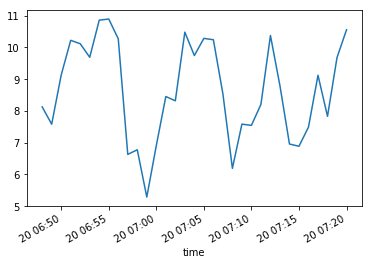

In [66]:
speed1m.plot()

In [67]:
import matplotlib.pyplot as plt

In [68]:
plt.rcParams['figure.figsize'] = (10, 6)

In [69]:
plt.style.available

['classic',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-white',
 '_classic_test',
 'seaborn-pastel',
 'ggplot',
 'seaborn-dark',
 'seaborn',
 'fast',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn-dark-palette',
 'seaborn-deep',
 'seaborn-colorblind',
 'seaborn-muted',
 'tableau-colorblind10',
 'seaborn-ticks',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-talk',
 'bmh',
 'grayscale',
 'dark_background']

In [70]:
plt.style.use('seaborn-whitegrid')

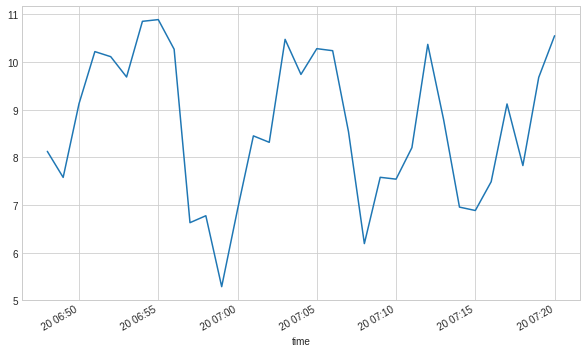

In [71]:
speed1m.plot()